# Лаб. №6: Визуализация многомерных данных с использованием специализированной визуализации

Для анализа был выбран датасет "More Guns, Less Crime?", представляющий собой набор данных по 50 штатам США плюс округ Колумбия (в общей сложности 51 штат), с разбивкой по годам за 1977-1999 годы.


Описание датасета: https://vincentarelbundock.github.io/Rdatasets/doc/AER/Guns.html

# Описание данных

Данные являются многомерными, поскольку для каждого года фиксируется вектор наблюдений. Каждая запись характеризуется 13-ю признаками:

1) state - фактор, указывающий на штат;

2) year - год, к которому относятся данные;

3) violent - уровень насильственных преступлений (инциденты на 100 000 человек населения);

4) murder - уровень убийств (инцидент на 100 000);

5) robbery - частота ограблений (инцидент на 100 000);

6) prisoners - количество заключенных в предыдущем году (осужденные на 100 000 жителей; значение за предыдущий год);

7) afam - процент афроамериканцев от населения штата в возрасте от 10 до 64 лет;

8) caucasus - процент населения штата, являющегося европеоидом, в возрасте от 10 до 64 лет;

9) male - процентная доля мужского населения штата в возрасте от 10 до 29 лет;

10) population - население штата, в миллионах человек;

11) income - реальный личный доход на душу населения в штате (доллары США);

12) density - численность населения на квадратную милю площади суши, деленная на 1000;

13) law - фактор. Действует ли в этом году в штате закон о ношении оружия*?

*Закон о ношении оружия - это закон, который требует, чтобы правительства выдавали разрешения на скрытое ношение оружия любому заявителю, который соответствует необходимым критериям. Вторая поправка к Конституции Соединенных Штатов защищает право хранить и носить оружие, также известна как закон о ношении оружия.

In [39]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# чтение файла с диска и загрузка в датафрейм

path = "/content/drive/MyDrive/STUDY/Представление знаний и визуализация данных/Lab_6/Guns.csv"
df = pd.read_csv(path, index_col=0) #index_col=0 - убираем нумерацию строк
df.shape #размерность данных

(1173, 13)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Типы признаков

In [7]:
# вывод информации о признаках

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 1 to 1173
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1173 non-null   int64  
 1   violent     1173 non-null   float64
 2   murder      1173 non-null   float64
 3   robbery     1173 non-null   float64
 4   prisoners   1173 non-null   int64  
 5   afam        1173 non-null   float64
 6   cauc        1173 non-null   float64
 7   male        1173 non-null   float64
 8   population  1173 non-null   float64
 9   income      1173 non-null   float64
 10  density     1173 non-null   float64
 11  state       1173 non-null   object 
 12  law         1173 non-null   object 
dtypes: float64(9), int64(2), object(2)
memory usage: 128.3+ KB


Типы признаков:

1) state - номинальные категоризованные, неметрическая номинативная шкала;

2) year - номинальные категоризованные, неметрическая номинативная шкала;

3) violent - количественные, метрическая шкала отношений;

4) murder -  количественные, метрическая шкала отношений;

5) robbery -  количественные, метрическая шкала отношений;

6) prisoners -  количественные, метрическая шкала отношений;

7) afam - количественные, метрическая шкала отношений;

8) caucasus - количественные, метрическая шкала отношений;

9) male - количественные, метрическая шкала отношений;

10) population - количественные, абсолютная метрическая шкала;

11) income - количественные, метрическая шкала отношений;

12) density - количественные, метрическая шкала отношений;

13) law - номинальные категоризованные, неметрическая номинативная шкала;

# Лица Чернова

In [8]:
!pip install ChernoffFace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# импорт библиотек

from ChernoffFace import *
import numpy
import matplotlib.cm

In [10]:
# статистика за 1980 год
data1 = df.loc[df['year'] == 1980]

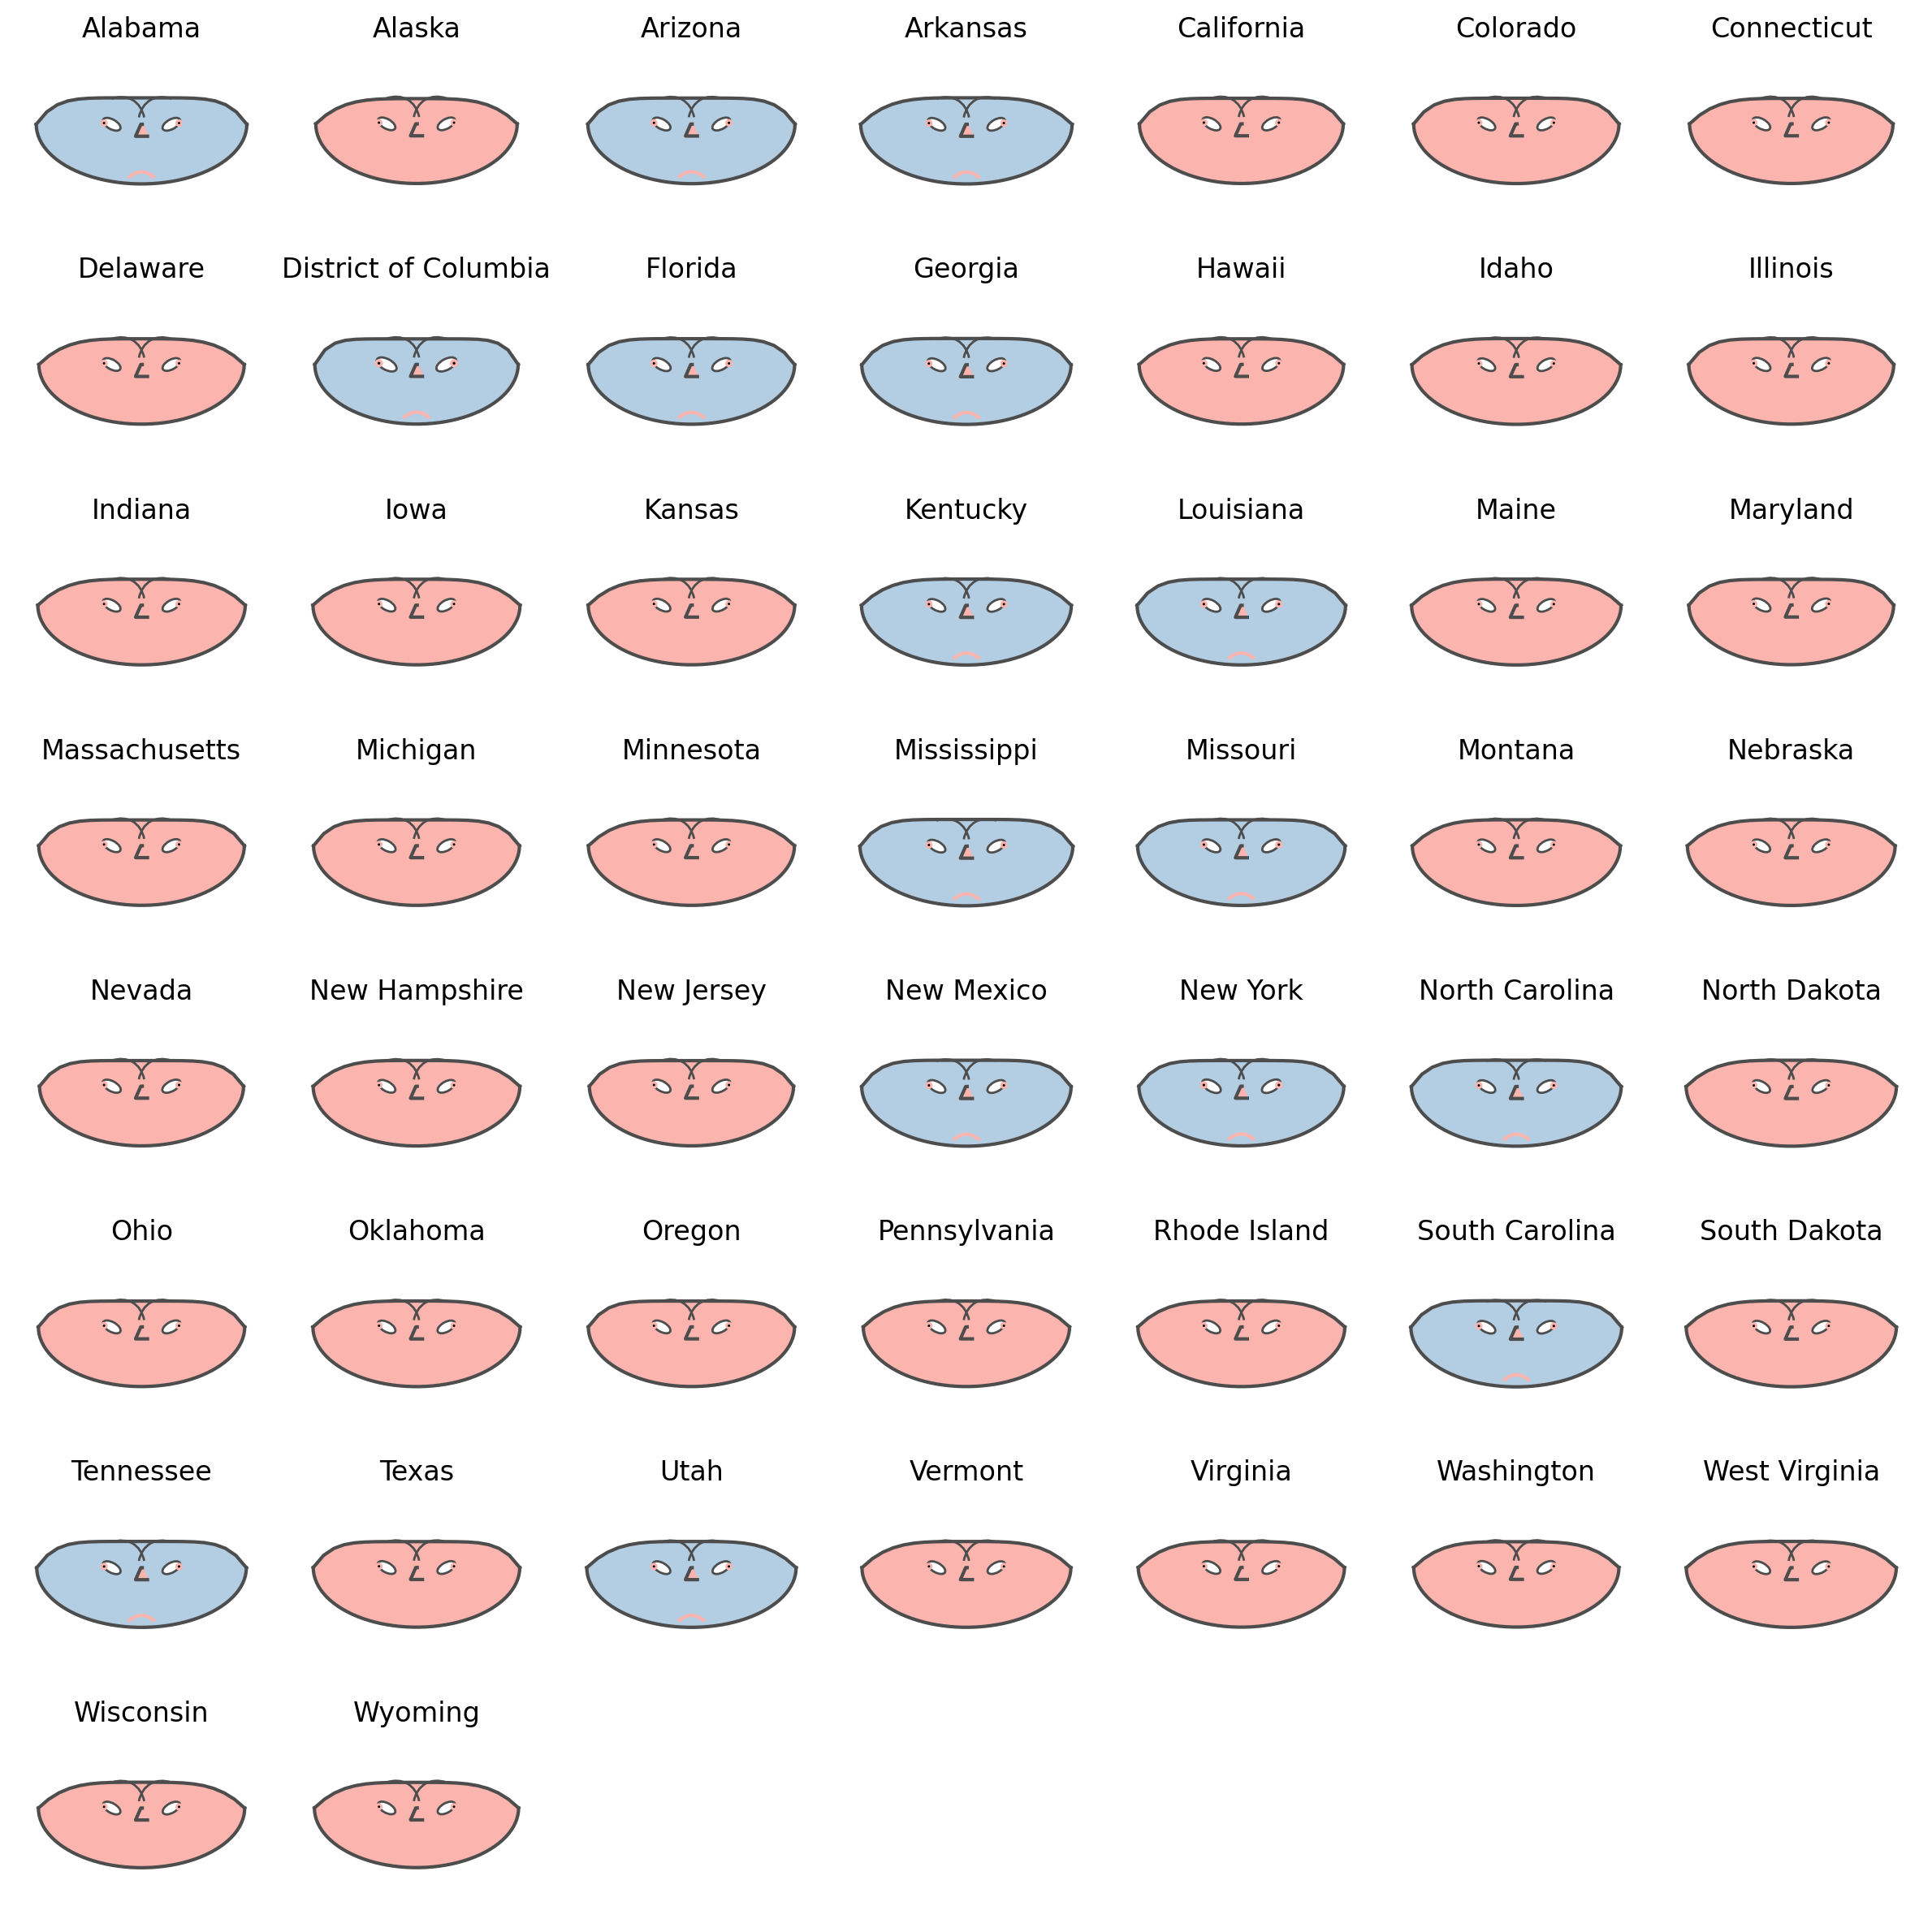

In [11]:
fig = chernoff_face(data=data1,
                    n_columns=None,
                    long_face=False,
                    color_mapper=matplotlib.cm.Pastel1,
                    figsize=(12, 12), dpi=200)
fig.tight_layout()
matplotlib.pyplot.show()

Построили лица Чернова по всем признакам для штатов за 1980 год.
Из визуального представления видно, что около трети штатов (голубые) отличаются от остальных.

In [12]:
# сгруппируем данные по штатам и построим лица Чернова
# по признакам 'violent','robbery','murder'

df_gr_state = df.groupby(['state']).mean().reset_index()
df_gr_st_3 = df_gr_state[['violent','robbery','murder','state']]

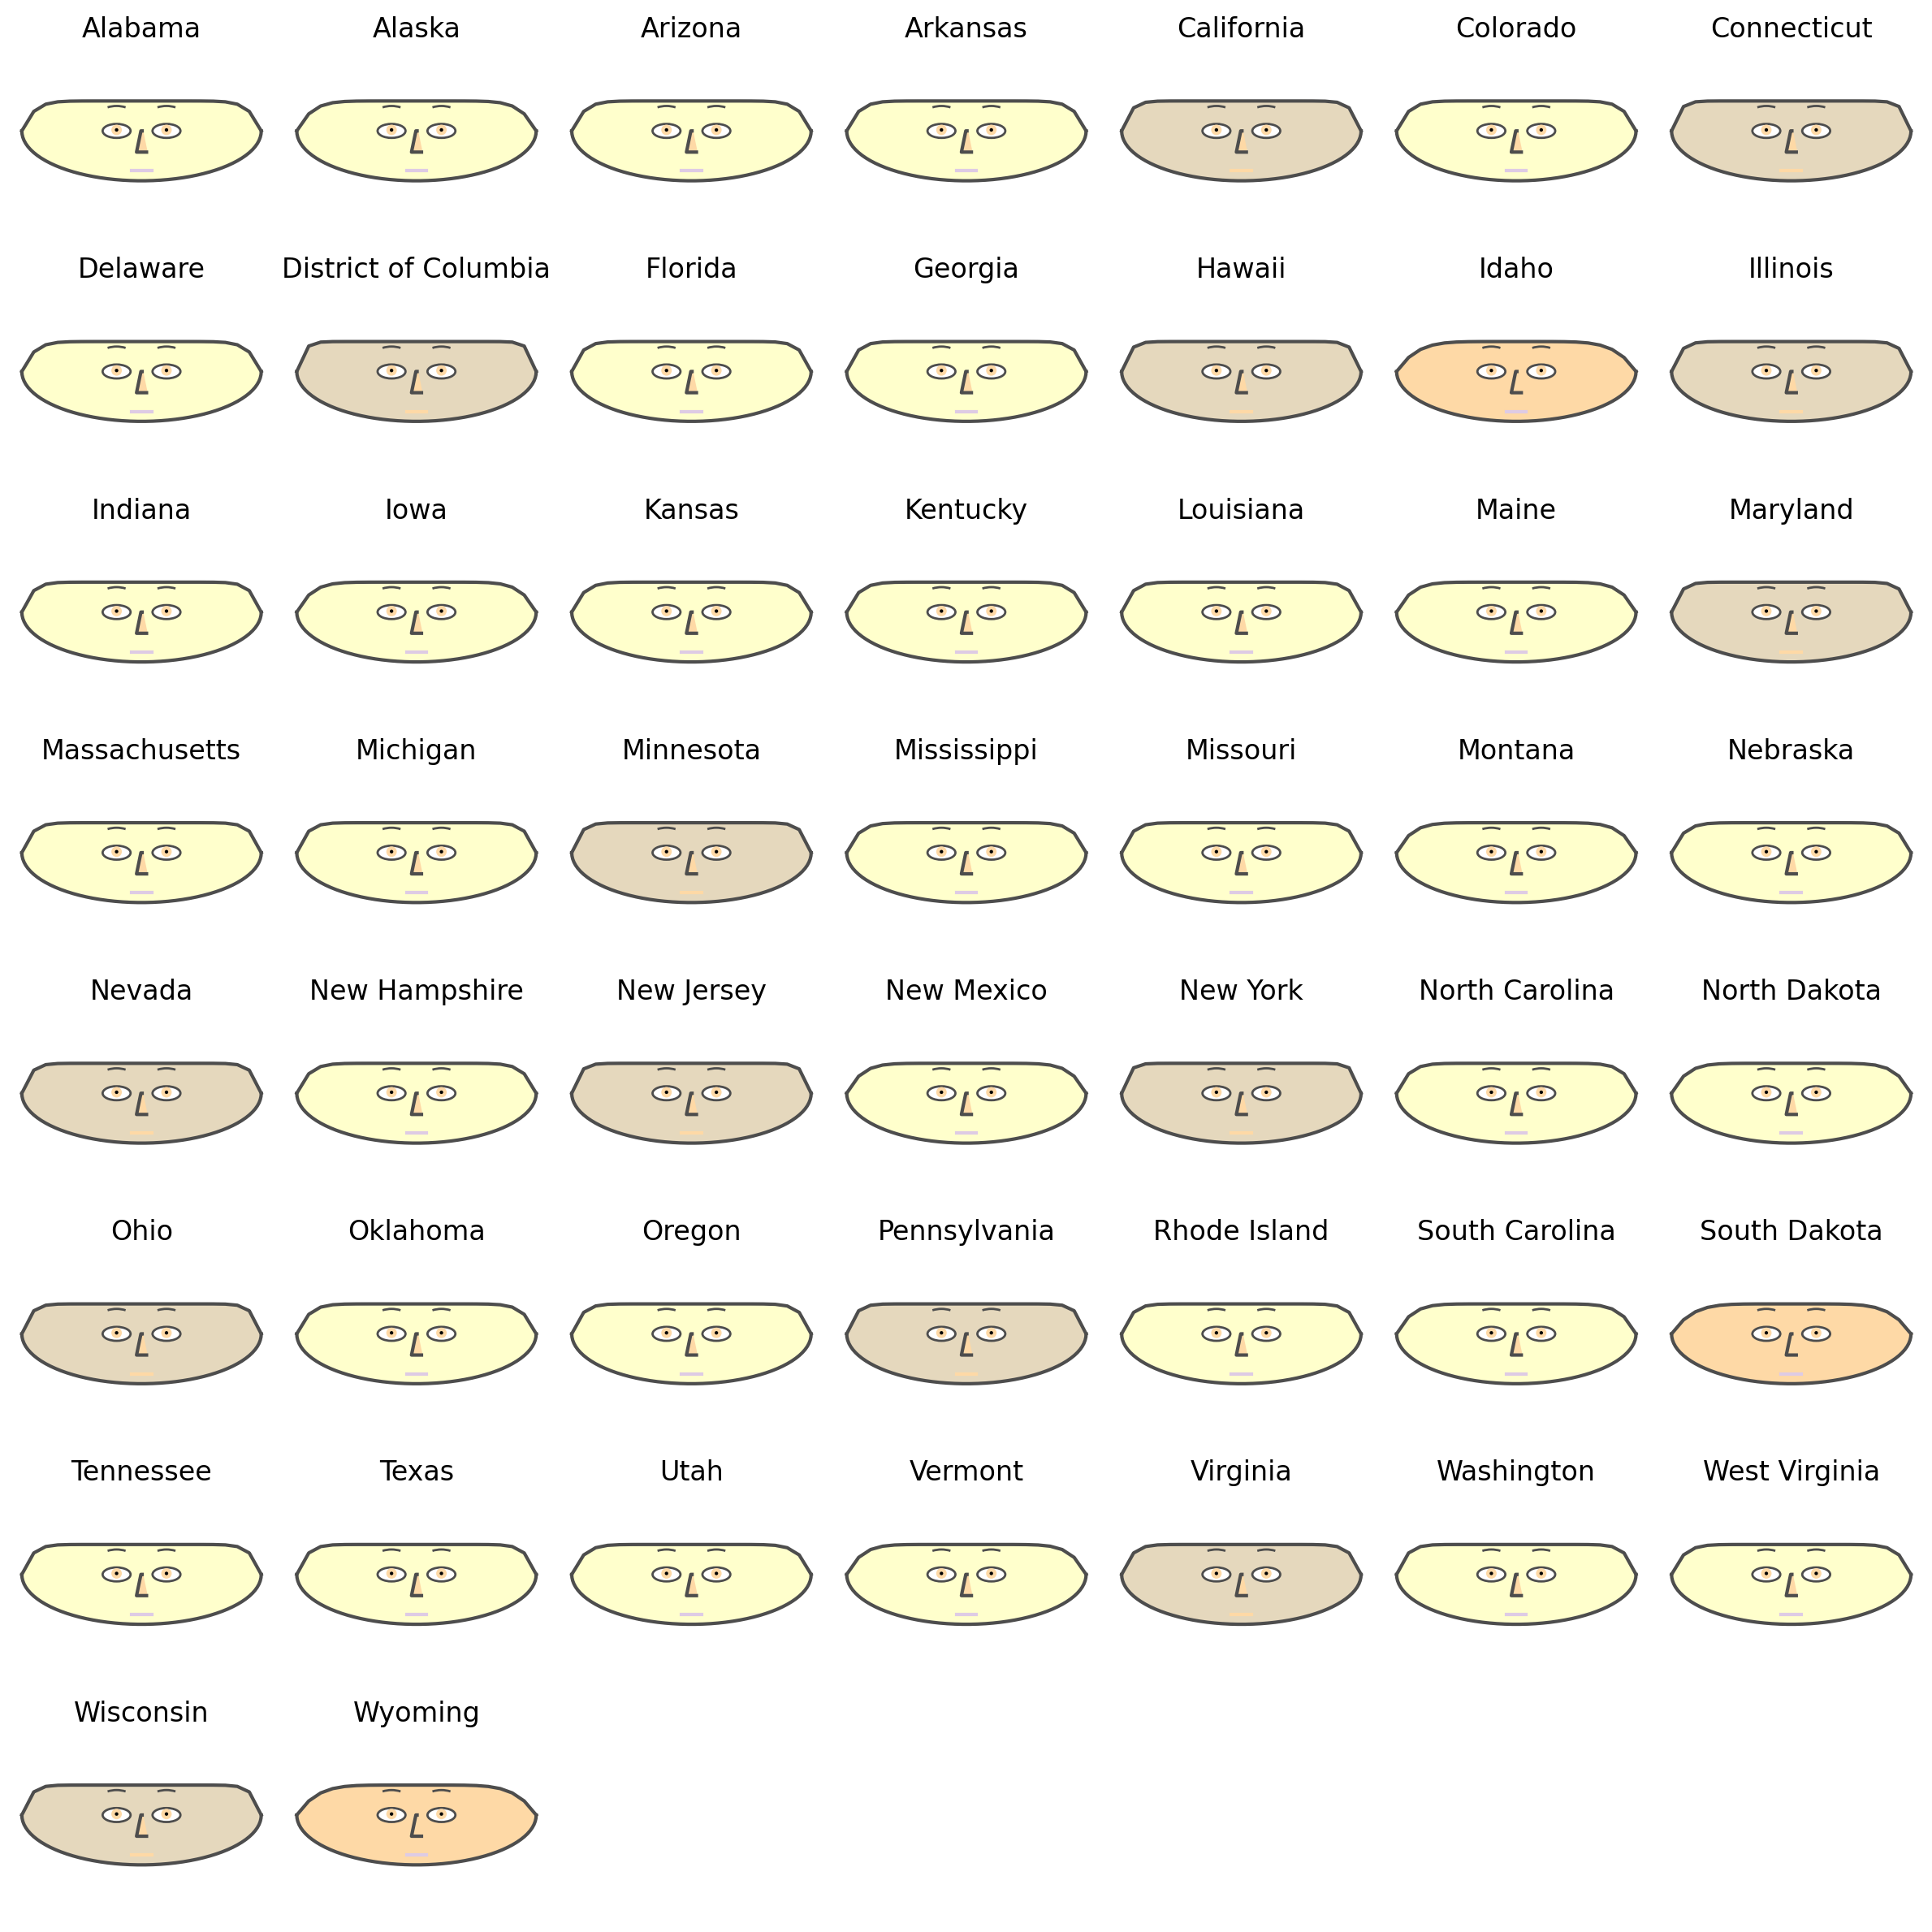

In [13]:
fig = chernoff_face(data=df_gr_st_3,
                    n_columns=None,
                    long_face=False,
                    color_mapper=matplotlib.cm.Pastel1,
                    figsize=(12, 12), dpi=200)
fig.tight_layout()
matplotlib.pyplot.show()

Из представления видно, что штаты Wyoming, South Dakota, Idaho сильно отличаются от других штатов (оранжевый цвет).

In [14]:
# построим лица Чернова для сгруппированных по штатам данных,
# но для признаков 'afam','robbery','violent'

df_gr_st_af = df_gr_state[['afam','robbery','violent','state']]

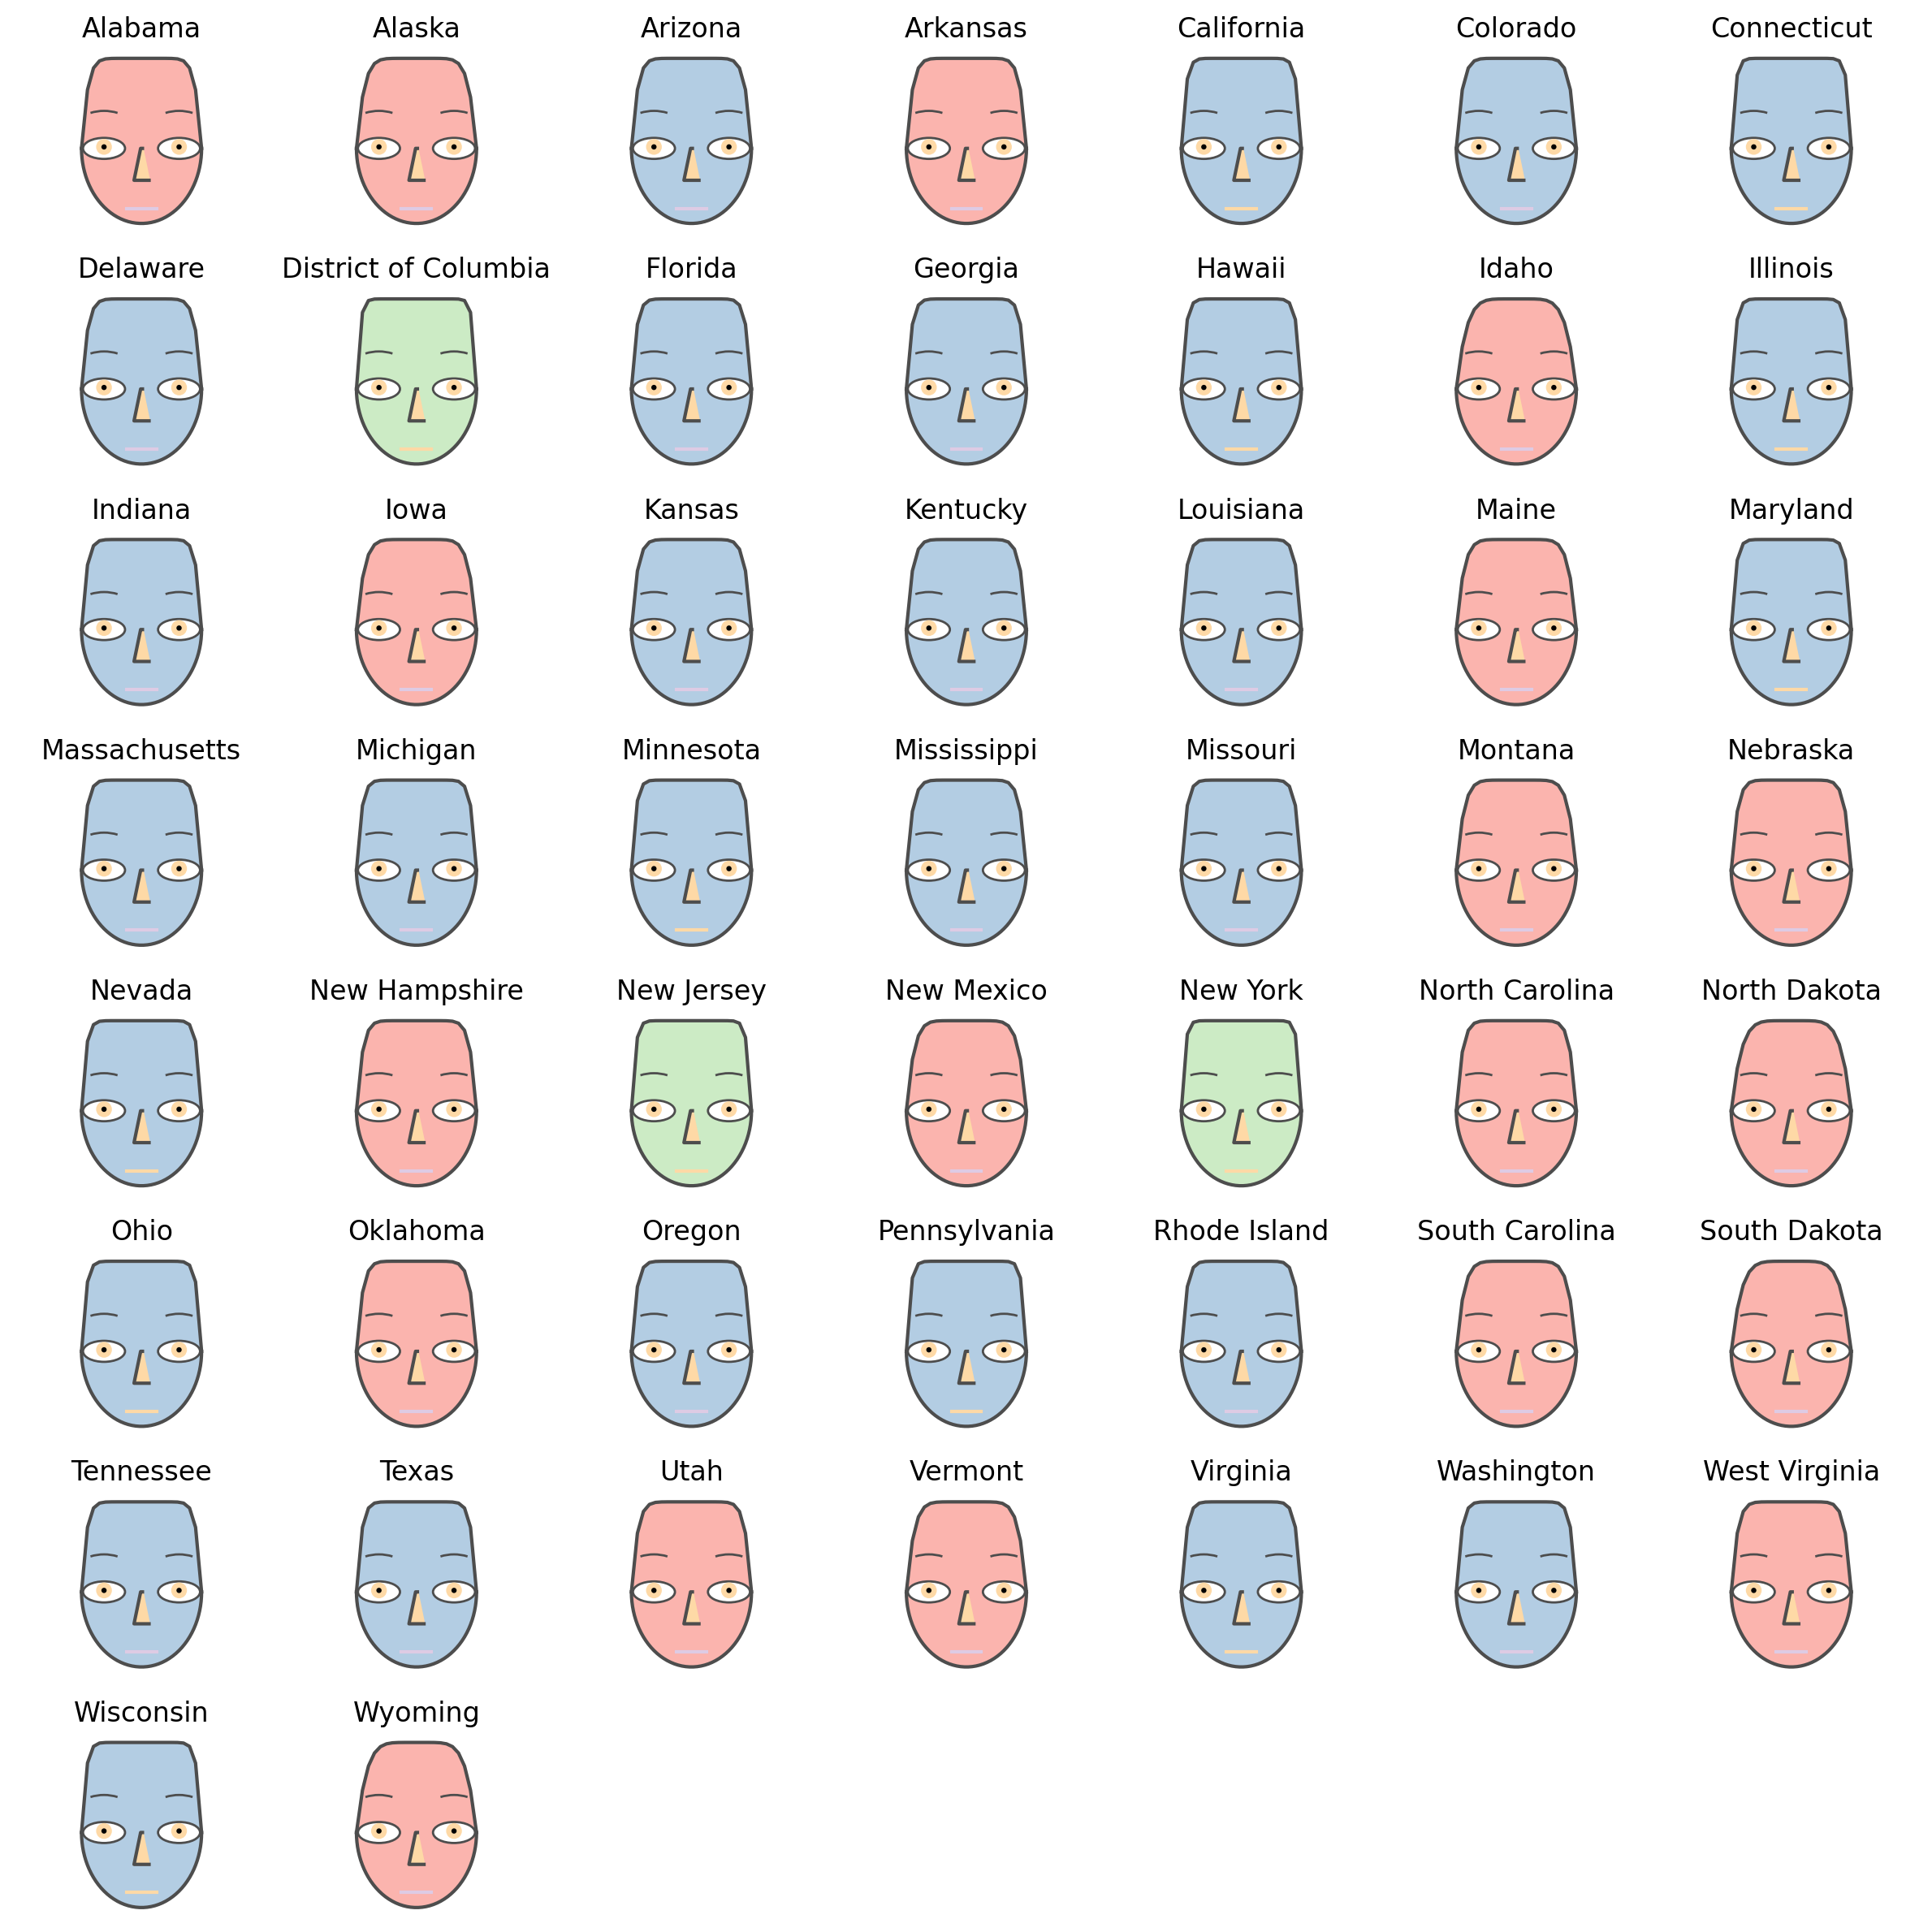

In [15]:
fig = chernoff_face(data=df_gr_st_af,
                    n_columns=None,
                    long_face=False,
                    color_mapper=matplotlib.cm.Pastel1,
                    figsize=(12, 12), dpi=200)
fig.tight_layout()
matplotlib.pyplot.show()

Штаты District of Columbia, New Jersey и New York (зелёный цвет) в среднем отличаются от других штатов.

In [16]:
# закодируем категориальную переменную law

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df["law_codes"] = labelencoder.fit_transform(df['law'])

In [17]:
# рассмотрим лица Чернова для параметров 'afam','robbery','prisoners'

df_new_gr_state = df.groupby(['state']).mean().reset_index()
df_new_gr_st = df_new_gr_state[['afam','robbery','prisoners','state','law_codes']]

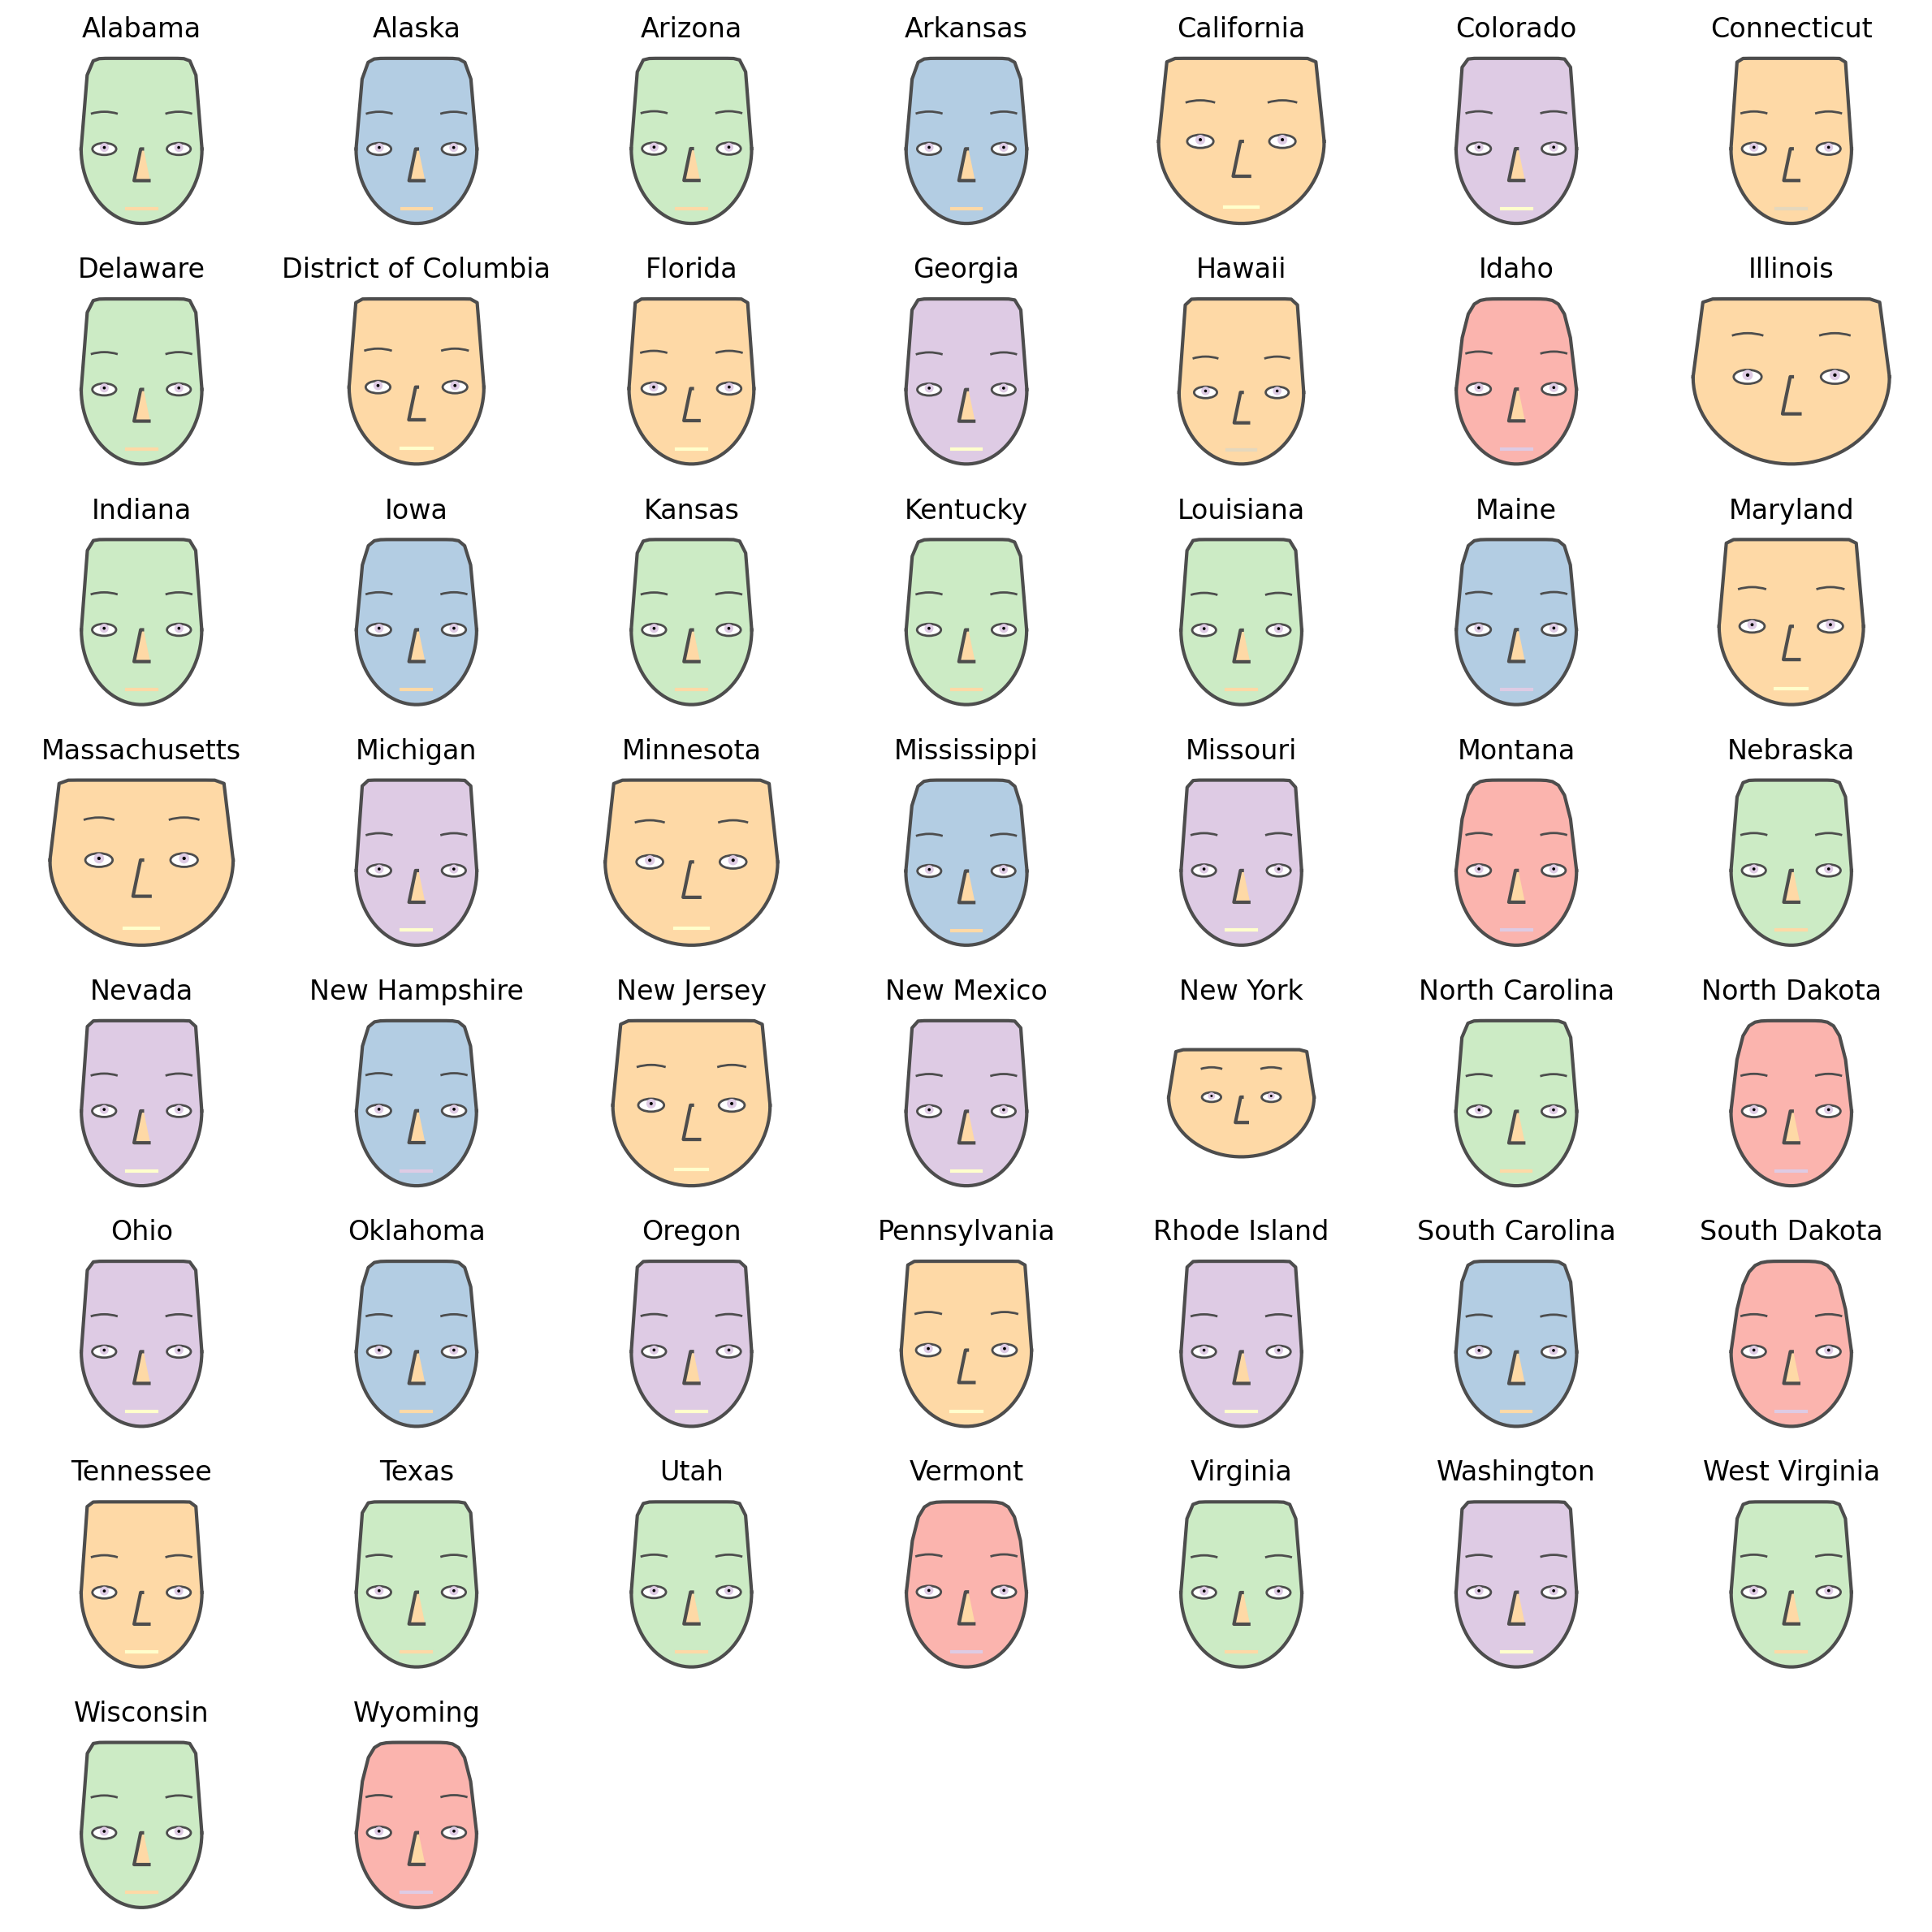

In [18]:
fig = chernoff_face(data=df_new_gr_st,
                    n_columns=None,
                    long_face=False,
                    color_mapper=matplotlib.cm.Pastel1,
                    figsize=(12, 12), dpi=200)
fig.tight_layout()
matplotlib.pyplot.show()

New York является явным выбросом среди штатов.

# RadViz

In [19]:
# сгруппируем данные по годам и усредним

df_gr_year = df.groupby(['year']).mean().reset_index()

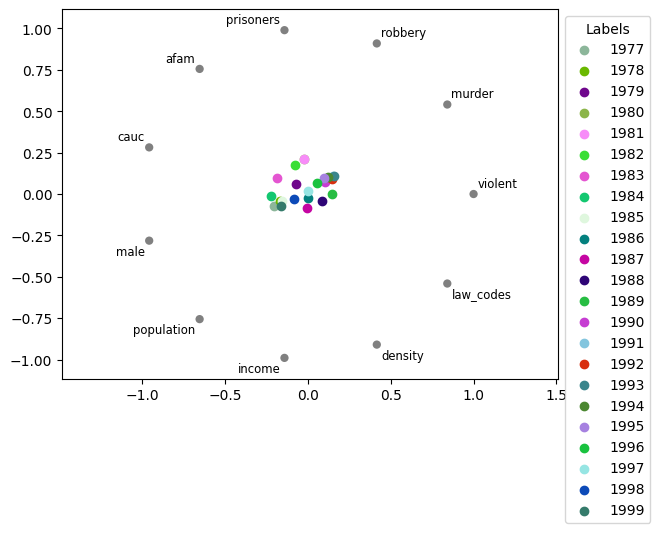

In [20]:
pd.plotting.radviz(df_gr_year, 'year').legend(loc='upper right', title='Labels',bbox_to_anchor=(1.2, 1)) 

Из диаграммы видно, что в среднем значения признаков по годам изменялись не сильно, следовательно, можно сделать предположения, что наличие или отсутствие закона на преступность повлияло незначительно.

In [21]:
# сгруппируем данные по признаку law

df_gr_law = df.groupby(['law']).mean().reset_index()

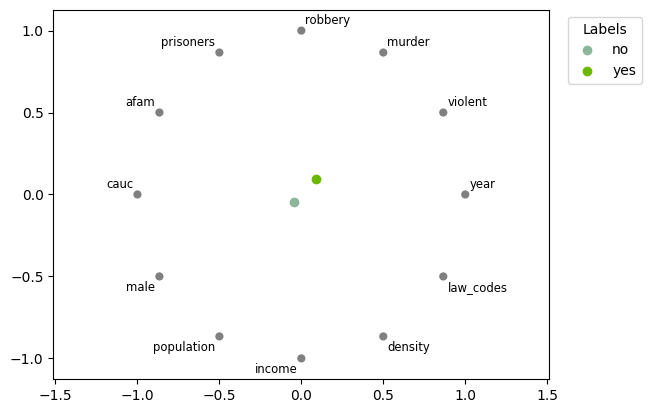

In [22]:
pd.plotting.radviz(df_gr_law, 'law').legend(loc='upper right', title='Labels',bbox_to_anchor=(1.2, 1)) 

Диаграмма во многом подтверждает предыдущее предположение о незначимом влиянии закона.

In [23]:
# сгруппируем по году и по признаку 'law'

df_gr_yl = df.groupby(['year', 'law']).mean().reset_index()

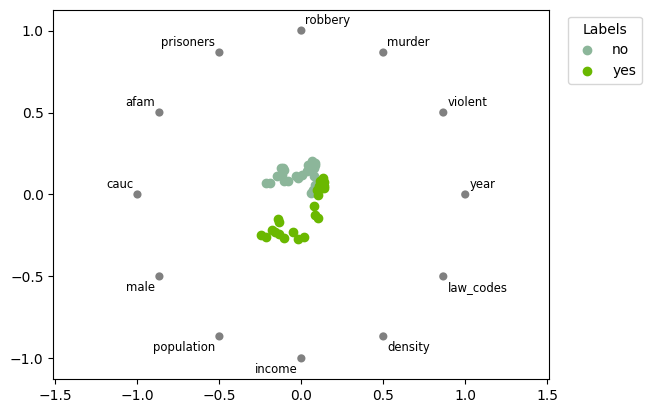

In [24]:
pd.plotting.radviz(df_gr_yl, 'law').legend(loc='upper right', title='Labels',bbox_to_anchor=(1.2, 1)) 

Из диаграммы видно, что закон чаще примался в штатах, в которых высокая доля мужского и европеоидного населения. Также для этих штатов характерен более низкий уровень преступности.

# Кривые Эндрюса

Построим кривые Эндрюса для признаков 'year','violent','afam'.

In [43]:
new_df_year = df[['year','violent','afam']]

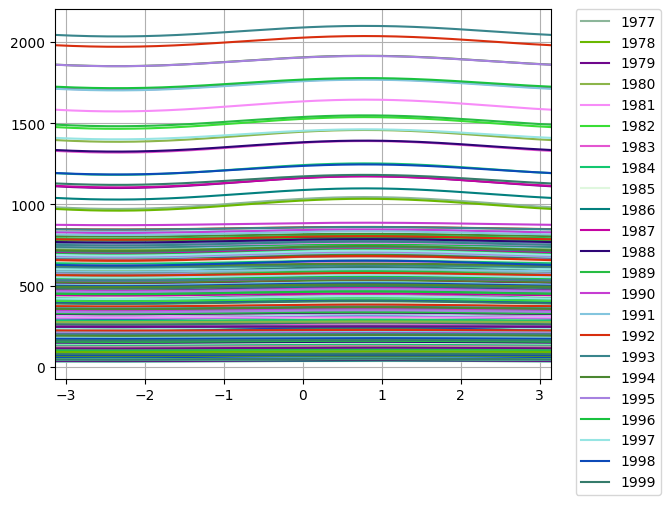

In [45]:
# кривые Эндрюса
x = pd.plotting.andrews_curves(new_df_year, 'year')
 
# построение графика
x.plot()
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )

# отображение
plt.show()

График для всех записей датасета показывает, что для большинства из них значения достаточно близки друг к другу.

Сгруппируем данные по годам и посчитаем среднее.

In [47]:
new_df_year_m = df.groupby(['year']).mean().reset_index()

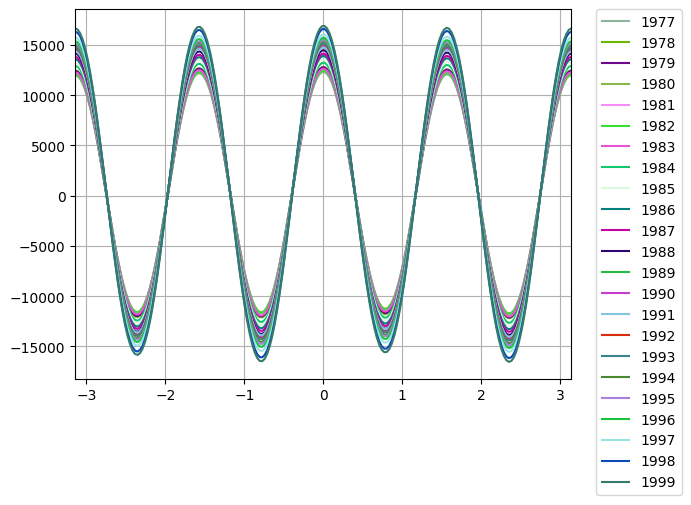

In [48]:
x = pd.plotting.andrews_curves(new_df_year_m, 'year')
 
x.plot()
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )

plt.show()

Усреднение по годам делает график нагляднее и демонстрирует, что в среднем значения признаков для каждого года близки.

Сгруппируем значения по признаку 'law'.

In [49]:
new_df_law_m = df.groupby(['law']).mean().reset_index()

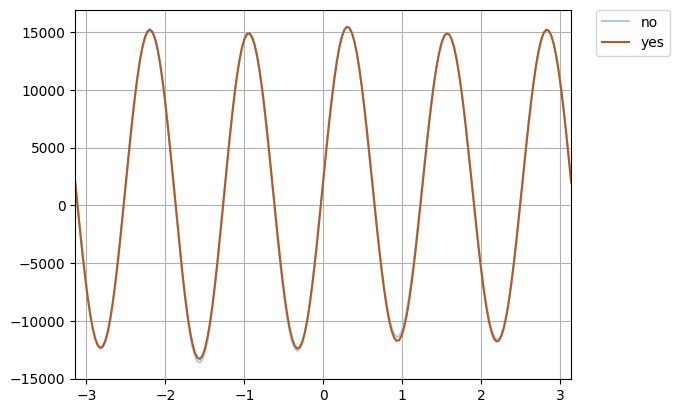

In [55]:
x = pd.plotting.andrews_curves(new_df_law_m, 'law',colormap='Paired')
 
x.plot()
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )

plt.show()

График также показывает отсутствие значимых отличий в данных усредненных по признаку 'law', поэтому можно сделать предположение, что наличие закона слабо влияет на уровень преступности.

Усредним данные по штатам.

In [57]:
new_df_state_m = df.groupby(['state']).mean().reset_index()

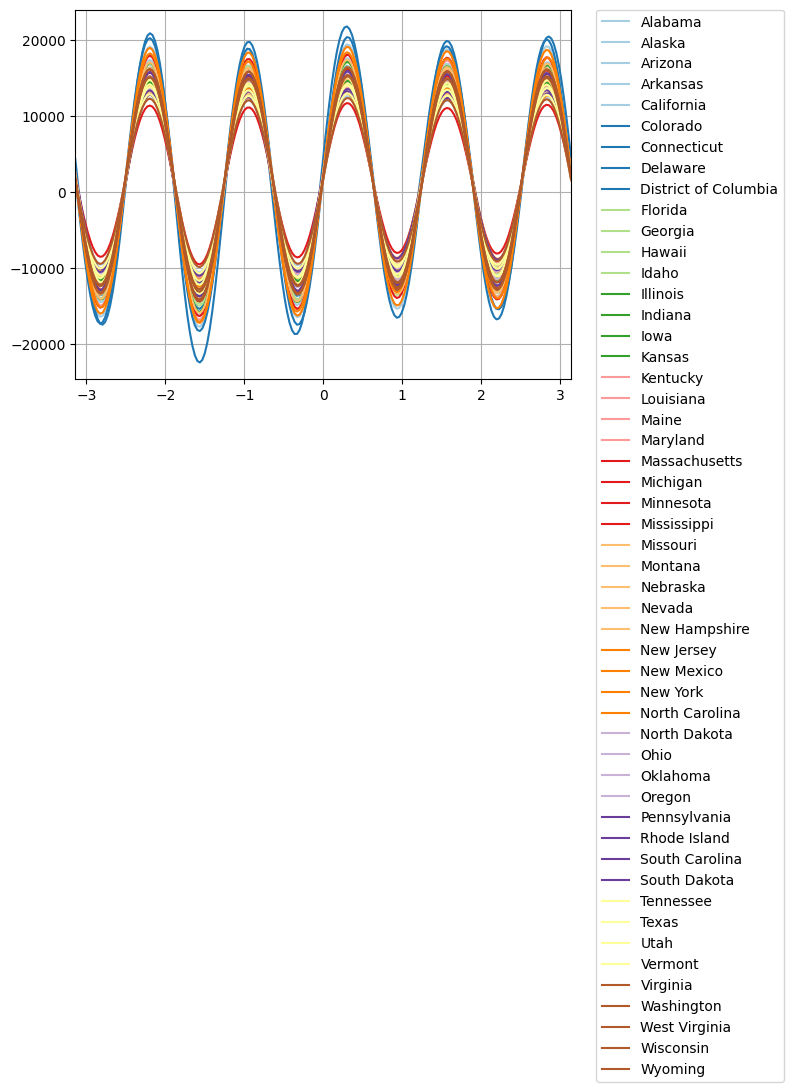

In [61]:
x = pd.plotting.andrews_curves(new_df_state_m, 'state',colormap='Paired')
 
x.plot()
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )

plt.show()

Среди всех штатов наиболее выделяется округ Колумбия.

# Выводы

Лица Чернова, RadViz и кривые Эндрюса представляют из себя необычные способы визуализации многомерных данных. При построении графиков данных типов могут возникнуть сложности в их интерпретации из-за некоторой специфичности идей, лежащих в основе этих способов визуализации, но основным преимуществом методов является возможность быстро оценить представленную ситуацию, когда необходимо исследовать предположительно сложные взаимосвязи между несколькими переменными. 